# Projet 2 - 01 : Data Cleaning Notebook

# Settings

### Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/Colab Notebooks/OC_IML/OC_IML_P2_Sante"
!pip install -r requirements.txt

/content/drive/MyDrive/Colab Notebooks/OC_IML/OC_IML_P2_Sante


In [ ]:
!unzip data

### Packages import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# matplotlib settings
plt.style.use('fivethirtyeight')
# pandas settings
pd.set_option('display.float_format', lambda x: f'{x}.3f')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## Data import

The Open Facts Food dataset can be found [here](https://world.openfoodfacts.org/)

In [6]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')
print("Initial dataset : {} rows / {} columns".format(data.shape[0], data.shape[1]))
data.head()

FileNotFoundError: ignored

In [ ]:
# set code as index
data.set_index('code', inplace=True)

The dataset is wide so I immediately delete unnecessary columns to fasten the processing

In [ ]:
# useless columns : images + url + english duplicates + tags
cols = ['creator',
        'url',
        'created_t',
        'last_modified_t',
        'image_url',
        'image_small_url',
        'image_ingredients_url',
        'image_ingredients_small_url',
        'image_nutrition_url',
        'image_nutrition_small_url',
        'categories',
        'labels',
        'countries',
        'states',
        'states_fr',
        'main_category']

# columns that contains a list of tags
for col in data.columns:
    if col.endswith('_tags'):
        cols.append(col)
        
# drop these columns
data = data.drop(columns=cols)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                       

Remaining data : 1555554 rows / 152 columns


## 1. Missing values

In [ ]:
# replace "nan" (string) by np.nan
data.replace('nan', np.nan, inplace=True)

In [ ]:
# Number of null values for each column
data.isnull().sum().sort_values()

created_datetime                   0
last_modified_datetime             0
pnns_groups_2                   3595
countries_fr                    5162
pnns_groups_1                  18549
                              ...   
melissic-acid_100g           1555554
elaidic-acid_100g            1555554
mead-acid_100g               1555554
ingredients_from_palm_oil    1555554
gondoic-acid_100g            1555554
Length: 152, dtype: int64

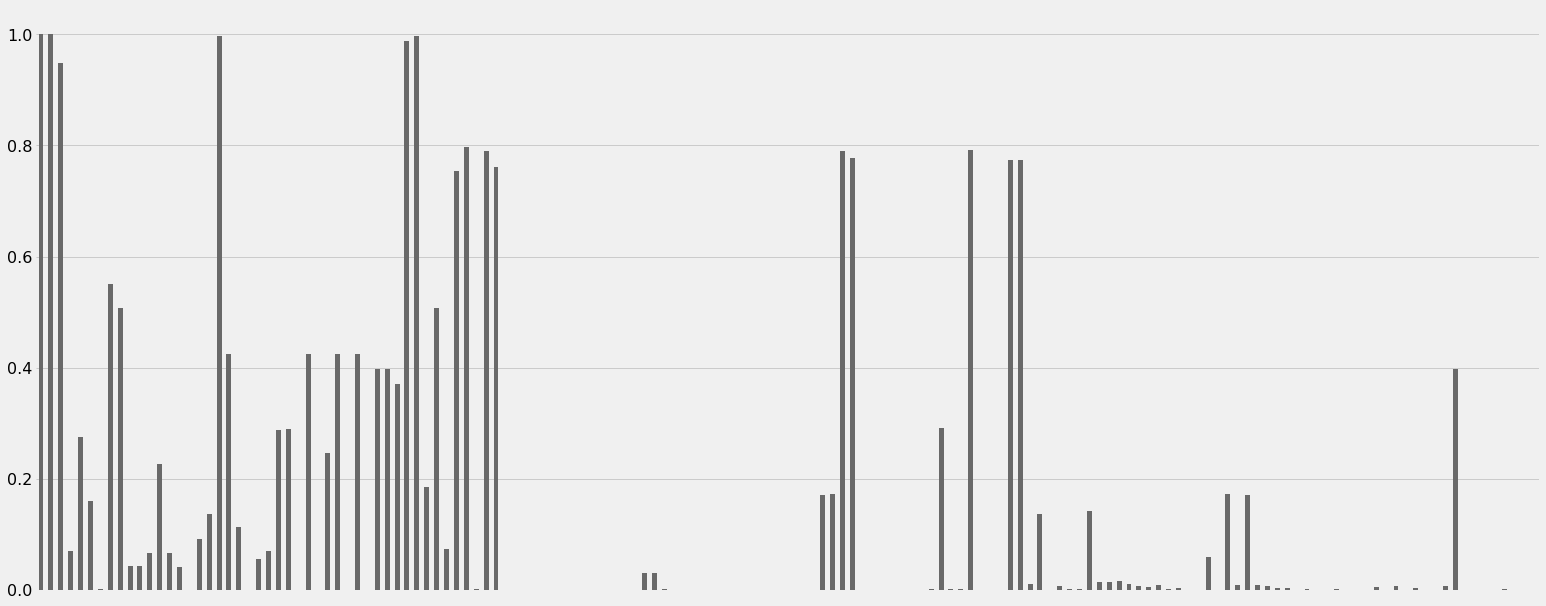

In [ ]:
# displays the proportion of data in each column
msno.bar(data)

```
ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (152).
```
- This error on the previous cell is caused by the version 3.3.0 of Matplotlib. To solve it, downgrade Matplotib package to v3.2.1

**There is a lot of empty columns. I'll drop those that do not contain enough data (<20%).**

In [ ]:
# drop columns with less than 20% data 
data = data.dropna(axis=1, thresh= len(data)*0.2, how='all')
# drop empty rows
data = data.dropna(axis=0, how='all')
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                       

Remaining data : 1555554 rows / 32 columns


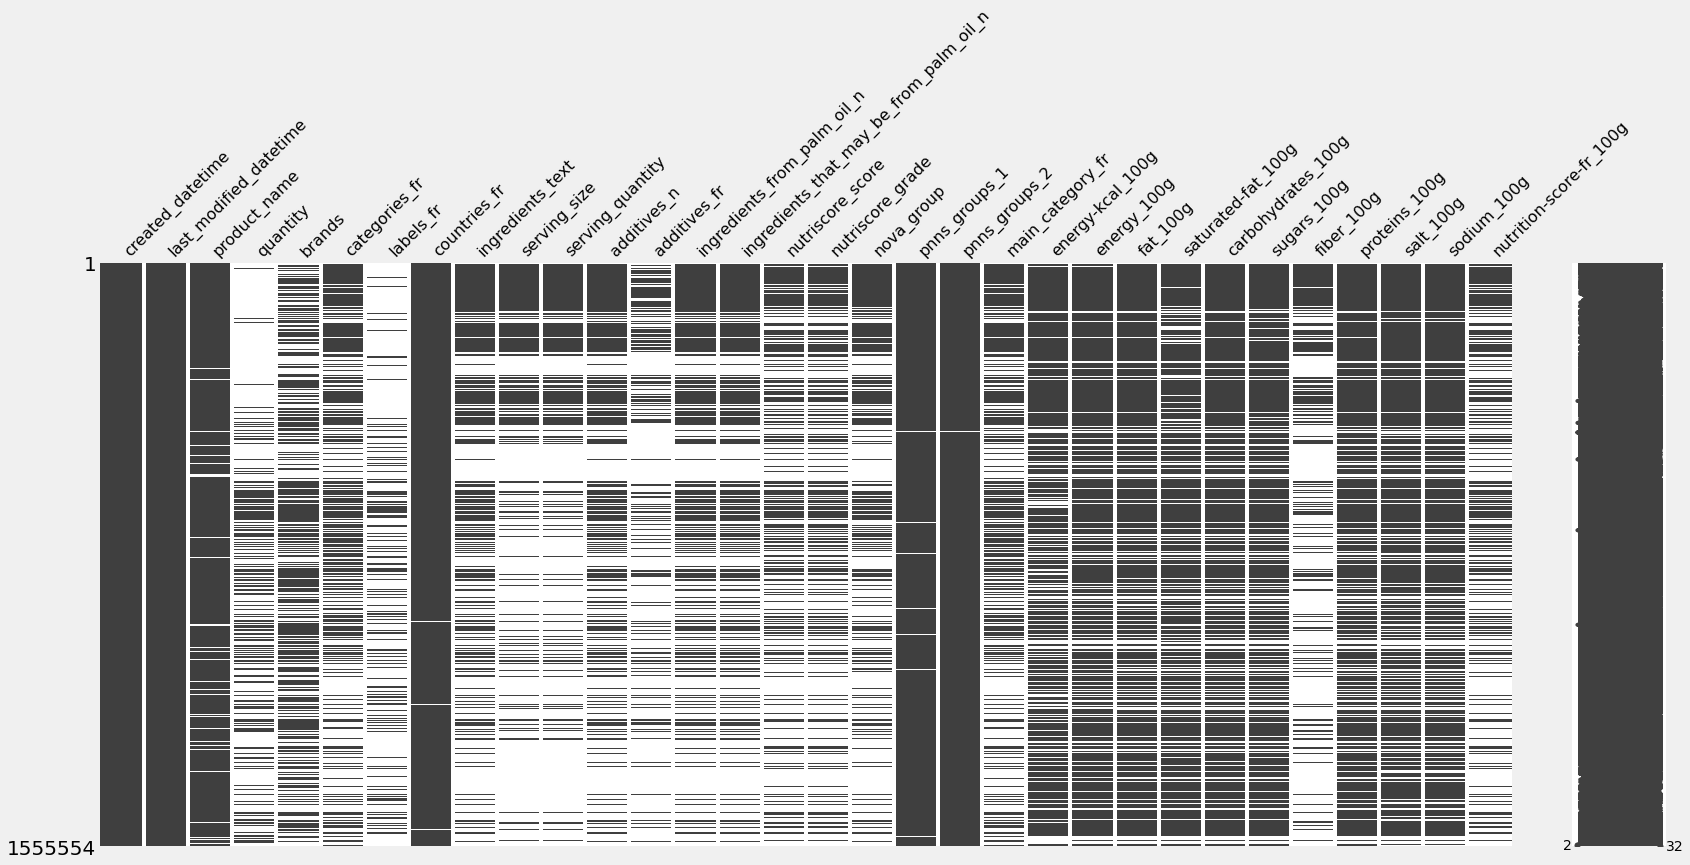

In [ ]:
msno.matrix(data)

In [ ]:
# Fill the 'product_name' column
data['product_name'].fillna(value='product name unavailable', inplace=True)

created_datetime                                 0
last_modified_datetime                           0
product_name                                     0
pnns_groups_2                                 3595
countries_fr                                  5162
pnns_groups_1                                18549
energy_100g                                 316327
proteins_100g                               324815
fat_100g                                    325881
carbohydrates_100g                          326446
sugars_100g                                 347388
salt_100g                                   353126
sodium_100g                                 353131
saturated-fat_100g                          371979
energy-kcal_100g                            383880
brands                                      699923
main_category_fr                            765653
categories_fr                               765653
additives_n                                 894775
ingredients_from_palm_oil_n    

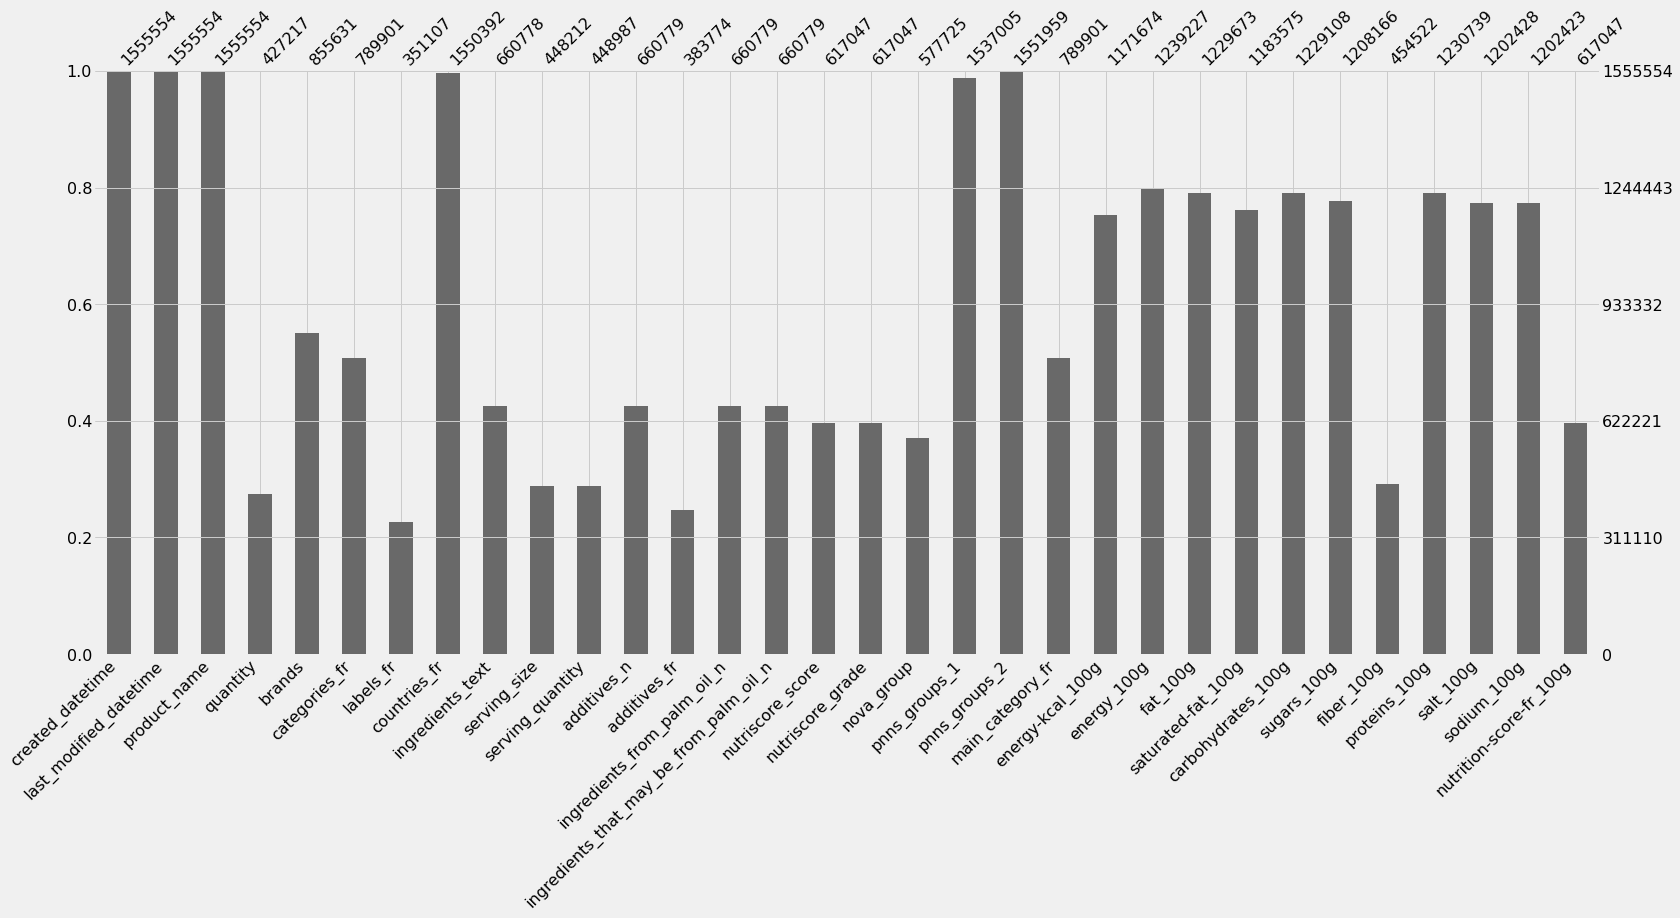

In [ ]:
print(data.isnull().sum().sort_values())
msno.bar(data)

## 2. Non numeric features

In [ ]:
data.dtypes.sort_values()

nutriscore_score                           float64
salt_100g                                  float64
proteins_100g                              float64
fiber_100g                                 float64
sugars_100g                                float64
carbohydrates_100g                         float64
saturated-fat_100g                         float64
fat_100g                                   float64
energy_100g                                float64
energy-kcal_100g                           float64
nova_group                                 float64
sodium_100g                                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition-score-fr_100g                    float64
additives_n                                float64
serving_quantity                           float64
ingredients_from_palm_oil_n                float64
additives_fr                                object
last_modified_datetime                      object
product_name                   

In [ ]:
# parsing datetime
data['created_datetime'] = pd.to_datetime(data['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [ ]:
# check for parsing problems
dates_problems = data[['created_datetime', 'last_modified_datetime']].isnull().sum()
print(dates_problems)
for col in data[['created_datetime', 'last_modified_datetime']].columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(method='ffill', inplace=True)
del dates_problems

created_datetime          0
last_modified_datetime    0
dtype: int64


In [ ]:
# nova_group = categorical variable
data['nova_group'] = data['nova_group'].astype(str)

In [ ]:
# lower strings
for col in data.select_dtypes(include=object).columns:
    data[col] = data[col].str.lower()
        
data.select_dtypes(include=object)

product_name quantity  \
code                                                                    
0000000000017                               vitória crackers      NaN   
0000000000031                                          cacao    130 g   
000000000003327986                 filetes de pollo empanado      NaN   
0000000000100                    moutarde au moût de raisin      100g   
00000000001111111111                                 sfiudwx    dgesc   
...                                                      ...      ...   
9999999901                                               scs      NaN   
9999999910128         sandwich club rillette poisson combava      NaN   
999999999                            thé noir bio darjeeling      NaN   
9999999990397                                           fati    440 g   
999999999999999                            signal toothpaste      NaN   

                             brands  \
code                                  
0000000000017                   NaN   
0000000000031                   NaN   
000000000003327986              NaN   
0000000000100         courte paille   
00000000001111111111           watt   
...                             ...   
9999999901                      NaN   
9999999910128                   NaN   
999999999                     pagès   
9999999990397                   NaN   
999999999999999                 NaN   

                                                      categories_fr  \
code                                                                  
0000000000017                                                   NaN   
0000000000031                                                   NaN   
000000000003327986                                              NaN   
0000000000100                  epicerie,condiments,sauces,moutardes   
00000000001111111111                                            xsf   
...                                                             ...   
9999999901                                                      NaN   
9999999910128                                                   NaN   
999999999                                                       NaN   
9999999990397                                                   NaN   
999999999999999       non alimentaire,open beauty facts,dentifrices   

                          labels_fr countries_fr  \
code                                               
0000000000017                   NaN       france   
0000000000031                   NaN       france   
000000000003327986              NaN      espagne   
0000000000100         delois-france       france   
00000000001111111111            NaN       france   
...                             ...          ...   
9999999901                      NaN  royaume-uni   
9999999910128                   NaN   la réunion   
999999999                       NaN       france   
9999999990397                   NaN     belgique   
999999999999999                 NaN       france   

                                                       ingredients_text  \
code                                                                      
0000000000017                                                       NaN   
0000000000031                                                       NaN   
000000000003327986                                                  NaN   
0000000000100         eau graines de téguments de moutarde vinaigre ...   
00000000001111111111                                                NaN   
...                                                                 ...   
9999999901                                                          NaN   
9999999910128                                                       NaN   
999999999                                                           NaN   
9999999990397                                                       NaN   
999999999999999                                                     NaN   

             

In [ ]:
data.dtypes.sort_values()

created_datetime                           datetime64[ns]
salt_100g                                         float64
proteins_100g                                     float64
fiber_100g                                        float64
sugars_100g                                       float64
carbohydrates_100g                                float64
saturated-fat_100g                                float64
fat_100g                                          float64
energy_100g                                       float64
energy-kcal_100g                                  float64
sodium_100g                                       float64
ingredients_that_may_be_from_palm_oil_n           float64
ingredients_from_palm_oil_n                       float64
nutriscore_score                                  float64
additives_n                                       float64
last_modified_datetime                     datetime64[ns]
nutrition-score-fr_100g                           float64
serving_quanti

## 3. Duplicates

In [ ]:
# Rows fully duplicated
print("Entire rows duplicated : ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Entire rows duplicated :  1100
Remaining data : 1554454 rows / 32 columns


In [ ]:
# Drop rows with same index
print("Rows with the same index : ", data.index.duplicated().sum())
data = data[~data.index.duplicated(keep='first')]

Rows with the same index :  359


In [ ]:
# Duplicates based on key features
key1 = ['product_name', 'nutrition-score-fr_100g', 'energy_100g', 'energy-kcal_100g', 'proteins_100g', 'carbohydrates_100g', 'fiber_100g', 'fat_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g']
# key2 = ['product_name', 'brands', 'serving_size', 'countries_fr', 'nutrition-score-fr_100g']
data.drop_duplicates(subset=key1, inplace=True)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                       

## 4. Outliers

In [ ]:
data.describe()

serving_quantity  additives_n  ingredients_from_palm_oil_n  \
count                  411906.000   606628.000                   606628.000   
mean        26974870749908524.000        2.083                        0.022   
std      17312445988687437824.000        2.939                        0.149   
min                         0.000        0.000                        0.000   
25%                        28.000        0.000                        0.000   
50%                        50.000        1.000                        0.000   
75%                       113.000        3.000                        0.000   
max   11111111111111100858368.000       39.000                        3.000   

       ingredients_that_may_be_from_palm_oil_n  nutriscore_score  \
count                               606628.000        571422.000   
mean                                     0.072             9.235   
std                                      0.308             8.883   
min                                      0.000           -15.000   
25%                                      0.000             2.000   
50%                                      0.000            10.000   
75%                                      0.000            16.000   
max                                      6.000            40.000   

       energy-kcal_100g                                     energy_100g  \
count       1088211.000                                     1154136.000   
mean        7998592.994       5775366931530503064443154146596487168.000   
std      8334050421.526    6204518384844989118207557271350253977600.000   
min               0.000                                           0.000   
25%             101.000                                         418.000   
50%             264.000                                        1092.000   
75%             400.000                                        1674.000   
max   8693855001005.000 6665558888888888950360610417759390841962496.000   

         fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
count 1144984.000         1105501.000         1144444.000  1127049.000   
mean       13.530       123021151.372              28.971       13.880   
std        95.220    129347887202.809              29.171       19.920   
min         0.000               0.000               0.000       -1.000   
25%         0.700               0.100               4.000        0.800   
50%         6.980               1.880              16.670        4.000   
75%        21.000               7.140              54.000       20.000   
max    100000.111 136000000238419.000            5310.000     1350.000   

       fiber_100g  proteins_100g   salt_100g  sodium_100g  \
count  426674.000    1146051.000 1116789.000  1116784.000   
mean        2.994          8.352       1.809        0.724   
std         6.399         10.842      76.816       30.724   
min       -20.000       -500.000       0.000        0.000   
25%         0.000          1.300       0.062        0.025   
50%         1.600          5.800       0.535        0.214   
75%         3.600         12.000       1.330        0.532   
max      2020.000       2500.000   66700.000    26700.000   

       nutrition-score-fr_100g  
count               571422.000  
mean                     9.235  
std                      8.883  
min                    -15.000  
25%                      2.000  
50%                     10.000  
75%                     16.000  
max                     40.000

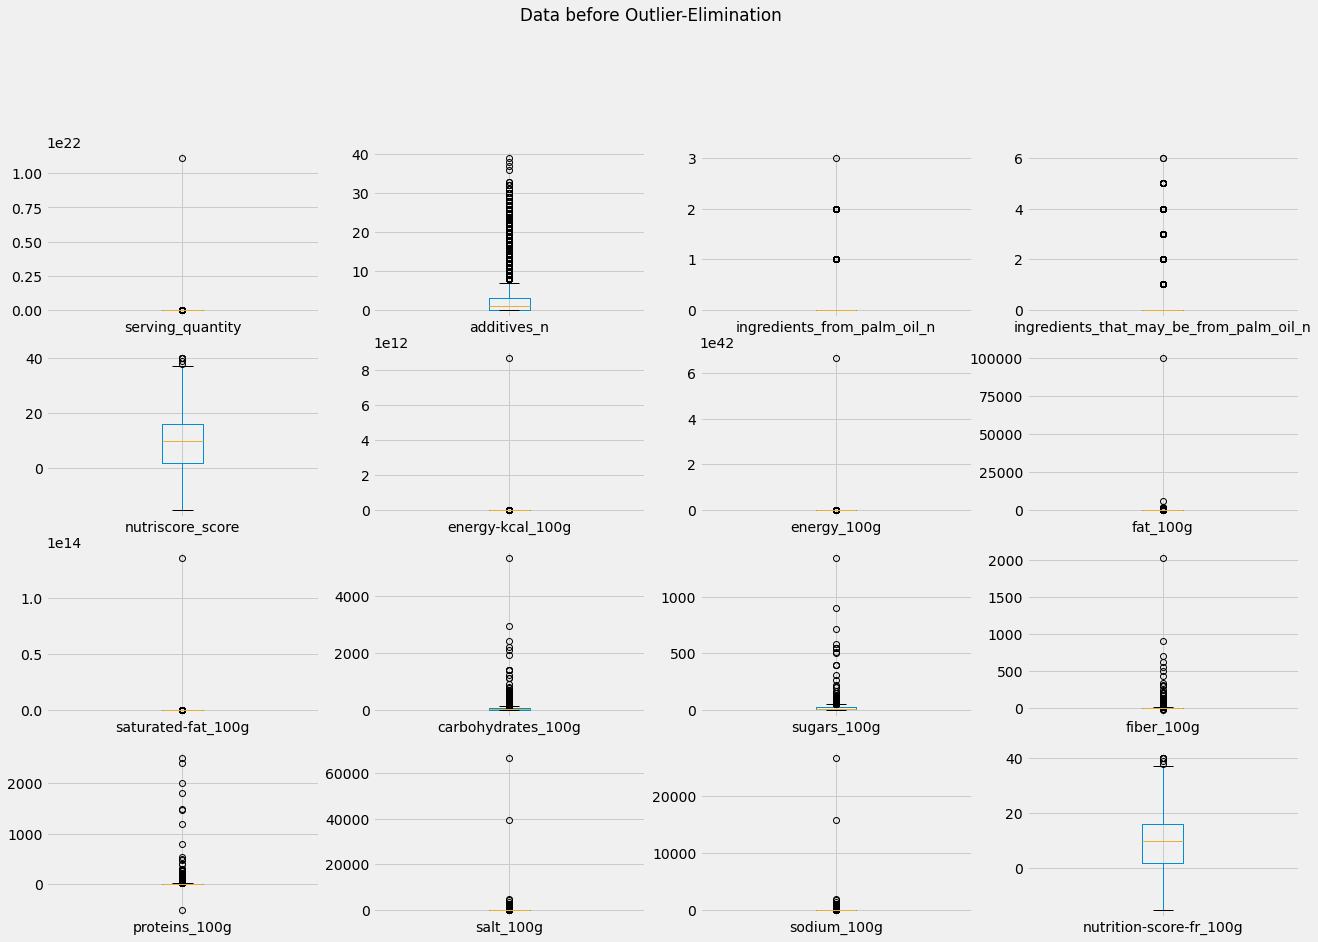

In [ ]:
# boxplot for every float columns
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before Outlier-Elimination', figsize=(20,20), layout=(6,4))
plt.show()

### Impossible values (according to their definition)

In [ ]:
for col in data.select_dtypes(include=float).columns:
    if (col == 'nutrition-score-fr_100g' or col == 'nutriscore_score'):
        # FSA nutrition score is between -15 & 40
        data = data[((data[col] >= -15) & (data[col] <= 40))]
        continue
    elif (col == 'energy-kcal_100g'):
        # Fat is the most energy dense at 9kcal/g so max is 900kcal for 100g
        data = data[((data[col] >= 0) & (data[col] <= 900))]
        continue
    elif (col == 'energy_100g'):
        # Fat is the most energy dense at 37kJ/g so max is 3700kJ for 100g
        data = data[((data[col] >= 0) & (data[col] <= 3700))]
        continue
    elif (col.endswith('_100g')):
        # Nutrient intake cannot be negative or exceed 100g
        data = data[((data[col] >= 0) & (data[col] <= 100))]    
        
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                      

Remaining data : 309929 rows / 32 columns


### Statistical Outliers

In [ ]:
%%time
# find outliers with Z-score
"""
for col in data.select_dtypes(include=float).columns:
    data = data[np.abs(data[col]-data[col].mean())<=(3*data[col].std())]
"""
# longer than IQR method

Wall time: 0 ns


'\nfor col in data.select_dtypes(include=float).columns:\n    data = data[np.abs(data[col]-data[col].mean())<=(3*data[col].std())]\n'

In [ ]:
%%time
# find outliers with IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

serving_quantity                            79.600
additives_n                                  3.000
ingredients_from_palm_oil_n                  0.000
ingredients_that_may_be_from_palm_oil_n      0.000
nutriscore_score                            14.000
energy-kcal_100g                           303.000
energy_100g                               1267.000
fat_100g                                    20.030
saturated-fat_100g                           6.670
carbohydrates_100g                          50.200
sugars_100g                                 20.810
fiber_100g                                   3.600
proteins_100g                                8.600
salt_100g                                    1.188
sodium_100g                                  0.475
nutrition-score-fr_100g                     14.000
dtype: float64
Wall time: 183 ms


In [ ]:
%%time
# drop outliers using IQR
print("Outliers : ", data[((data.select_dtypes(include=float) < (Q1 - 1.5 * IQR)) |(data.select_dtypes(include=float) > (Q3 + 1.5 * IQR))).any(axis=1)].shape[0])
data = data[~((data.select_dtypes(include=float) < (Q1 - 1.5 * IQR)) |(data.select_dtypes(include=float) > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

# Outliers : 138217 / Wall time: 821 ms

Outliers :  128068
Remaining data : 181861 rows / 32 columns
Wall time: 357 ms


In [ ]:
data.describe()

serving_quantity  additives_n  ingredients_from_palm_oil_n  \
count        142047.000   169323.000                   169323.000   
mean             72.668        1.656                        0.000   
std              49.861        1.949                        0.000   
min               0.000        0.000                        0.000   
25%              30.000        0.000                        0.000   
50%              56.000        1.000                        0.000   
75%             112.000        3.000                        0.000   
max             227.100        7.000                        0.000   

       ingredients_that_may_be_from_palm_oil_n  nutriscore_score  \
count                               169323.000        181861.000   
mean                                     0.000             6.483   
std                                      0.000             8.687   
min                                      0.000           -15.000   
25%                                      0.000            -1.000   
50%                                      0.000             5.000   
75%                                      0.000            13.000   
max                                      0.000            36.000   

       energy-kcal_100g  energy_100g   fat_100g  saturated-fat_100g  \
count        181861.000   181861.000 181861.000          181861.000   
mean            243.560     1018.306      9.923               3.013   
std             166.129      694.899     11.331               4.092   
min               0.000        0.000      0.000               0.000   
25%              89.000      369.000      0.700               0.000   
50%             226.000      946.000      5.000               1.000   
75%             379.000     1586.000     16.670               4.640   
max             868.000     3632.000     51.000              16.670   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
count          181861.000   181861.000  181861.000     181861.000 181861.000   
mean               31.772       11.070       2.209          6.754      0.779   
std                26.694       13.498       2.257          5.725      0.740   
min                 0.000        0.000       0.000          0.000      0.000   
25%                 7.600        1.410       0.000          2.000      0.100   
50%                22.500        4.500       1.700          5.880      0.640   
75%                56.760       16.810       3.600         10.000      1.210   
max               100.000       53.400       9.000         23.800      3.067   

       sodium_100g  nutrition-score-fr_100g  
count   181861.000               181861.000  
mean         0.312                    6.483  
std          0.296                    8.687  
min          0.000                  -15.000  
25%          0.040                   -1.000  
50%          0.256                    5.000  
75%          0.484                   13.000  
max          1.227                   36.000

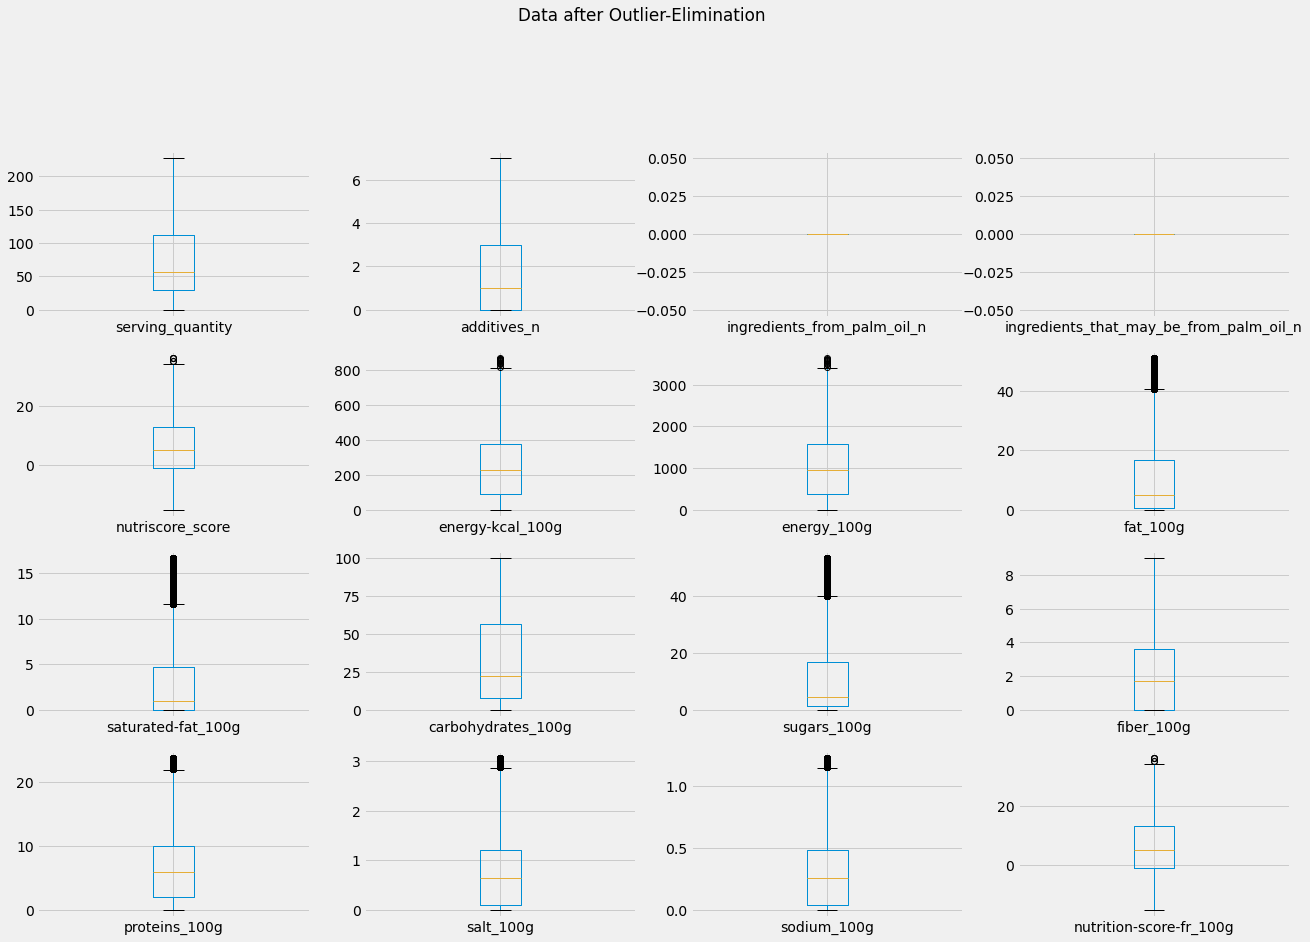

In [ ]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data after Outlier-Elimination', figsize=(20,20), layout=(6,4))
plt.show()

### Irrelevant data

**'nutrition-score-fr_100g' & 'nutriscore_score'** : these columns seems similar

In [ ]:
print('Different values : ', data[data['nutrition-score-fr_100g'] != data['nutriscore_score']].shape[0])

Different values :  0


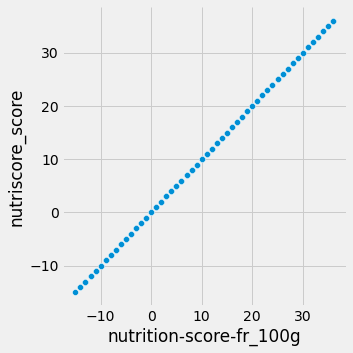

In [ ]:
sns.pairplot(data, x_vars=['nutrition-score-fr_100g'], y_vars=['nutriscore_score'], height=5)
plt.show()

We can conclude that these columns are the same so we can delete one

In [ ]:
# Drop one of these
data = data.drop(columns=['nutriscore_score'])

**Rename Columns with "-"**

In [ ]:
# Rename columns with "-" in their name
data.rename(columns={'nutrition-score-fr_100g':'nutrition_score_100g',
                     'saturated-fat_100g':'saturated_fat_100g',
                     'energy-kcal_100g':'energy_kcal_100g'}, inplace=True)
data.columns

Index(['created_datetime', 'last_modified_datetime', 'product_name',
       'quantity', 'brands', 'categories_fr', 'labels_fr', 'countries_fr',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_grade',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category_fr',
       'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition_score_100g'],
      dtype='object')

**'ingredients_from_palm_oil_n' & 'ingredients_that_may_be_from_palm_oil_n'**

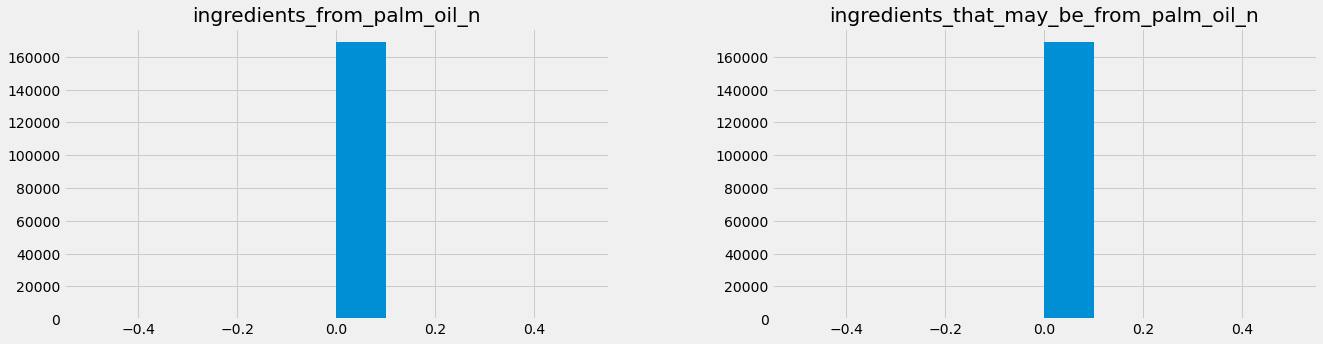

In [ ]:
data.hist(column=['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], figsize=(20,5))
plt.show()

In [ ]:
po_values = data[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].value_counts()
print(po_values)
print("Filling ratio of these columns : {:.2f} %".format(po_values[0][0] / data.shape[0] * 100))
del po_values

ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n
0.000                        0.000                                      169323
dtype: int64
Filling ratio of these columns : 93.11 %


These columns are not full of data and all their values are 0.  
We can consider they're not usable.

In [ ]:
data = data.drop(columns=['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'])

## 5. Numeric values imputation

In [ ]:
print(data.select_dtypes(include=float).isnull().sum().sort_values())

energy_kcal_100g            0
energy_100g                 0
fat_100g                    0
saturated_fat_100g          0
carbohydrates_100g          0
sugars_100g                 0
fiber_100g                  0
proteins_100g               0
salt_100g                   0
sodium_100g                 0
nutrition_score_100g        0
additives_n             12538
serving_quantity        39814
dtype: int64


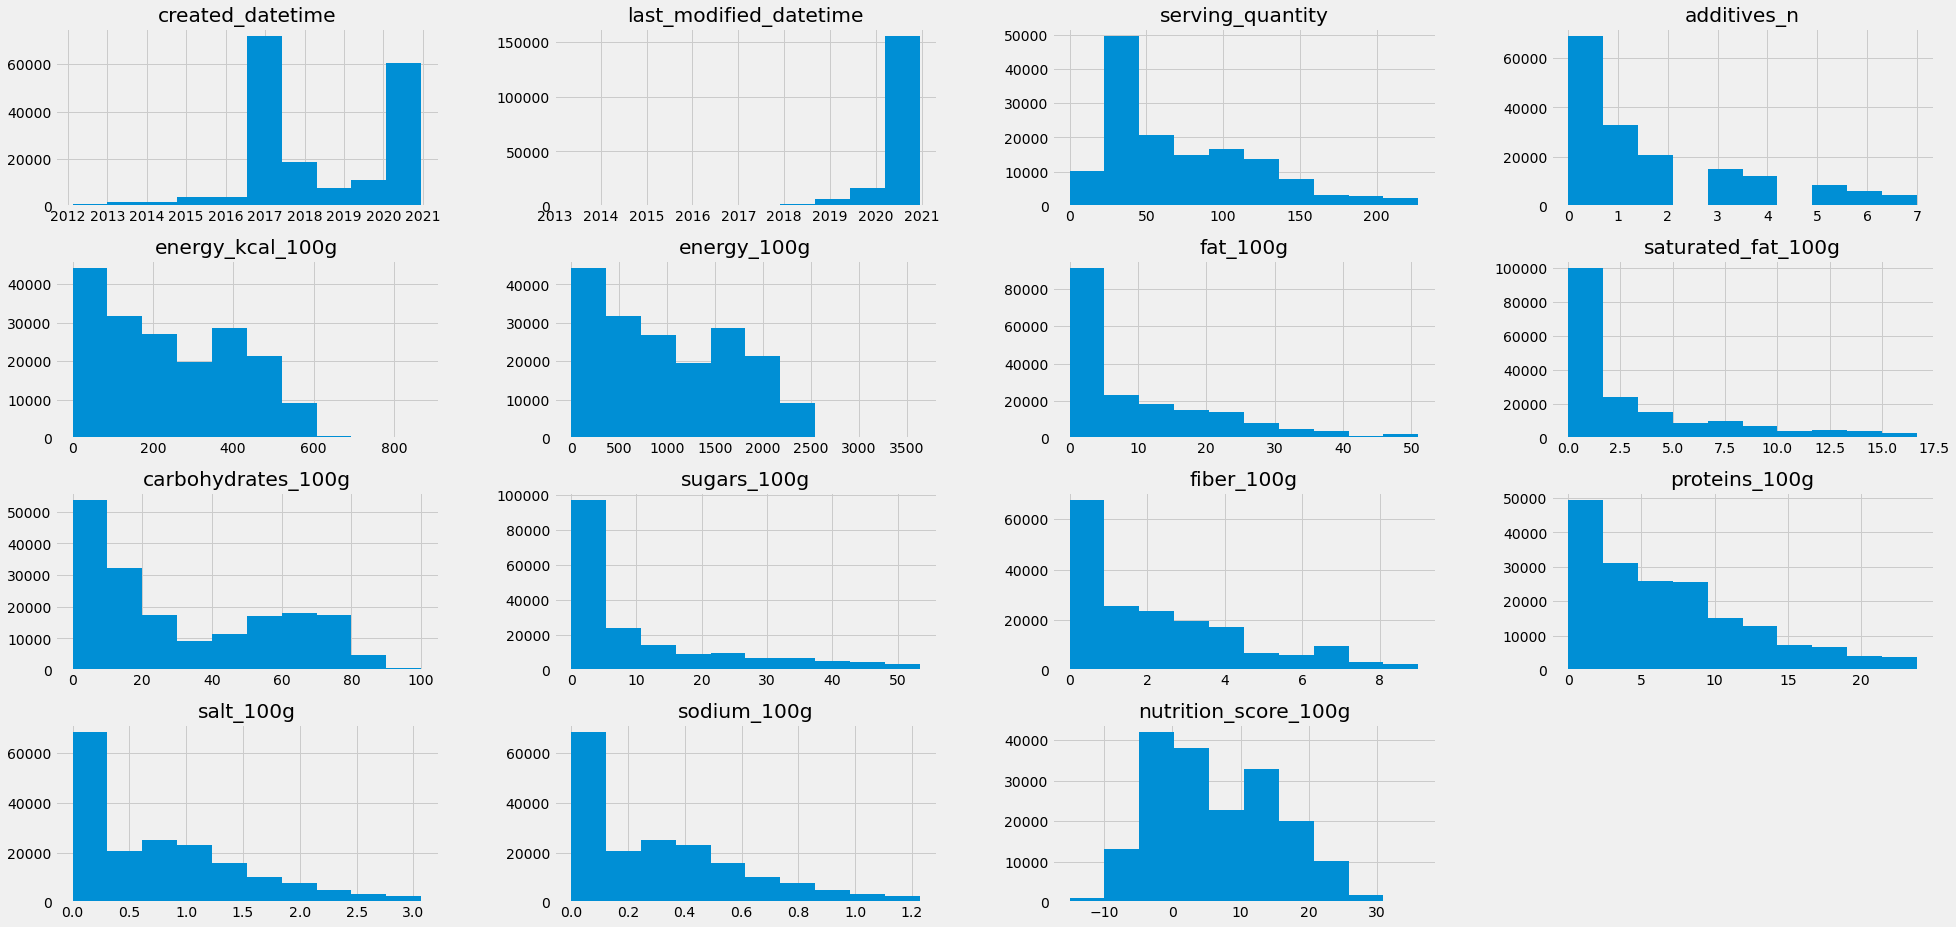

In [ ]:
data.hist(figsize=(30,15), layout=(4,4))
plt.show()

**Not Normal distributions so we will use the median of each columns for the imputation of numeric values**

In [ ]:
%%time
# impute missing values for numeric feature (median)

# Longer #
#from sklearn.impute import SimpleImputer
#numcols = data.select_dtypes(include=float).columns
#imp_mean = SimpleImputer( strategy='median')
#data[numcols] = imp_mean.fit_transform(data[numcols])

for col in data.select_dtypes(include=float).columns:
    data[col] = data[col].fillna(data[col].median())
print(data.select_dtypes(include=float).isnull().sum().sort_values())

serving_quantity        0
additives_n             0
energy_kcal_100g        0
energy_100g             0
fat_100g                0
saturated_fat_100g      0
carbohydrates_100g      0
sugars_100g             0
fiber_100g              0
proteins_100g           0
salt_100g               0
sodium_100g             0
nutrition_score_100g    0
dtype: int64
Wall time: 108 ms


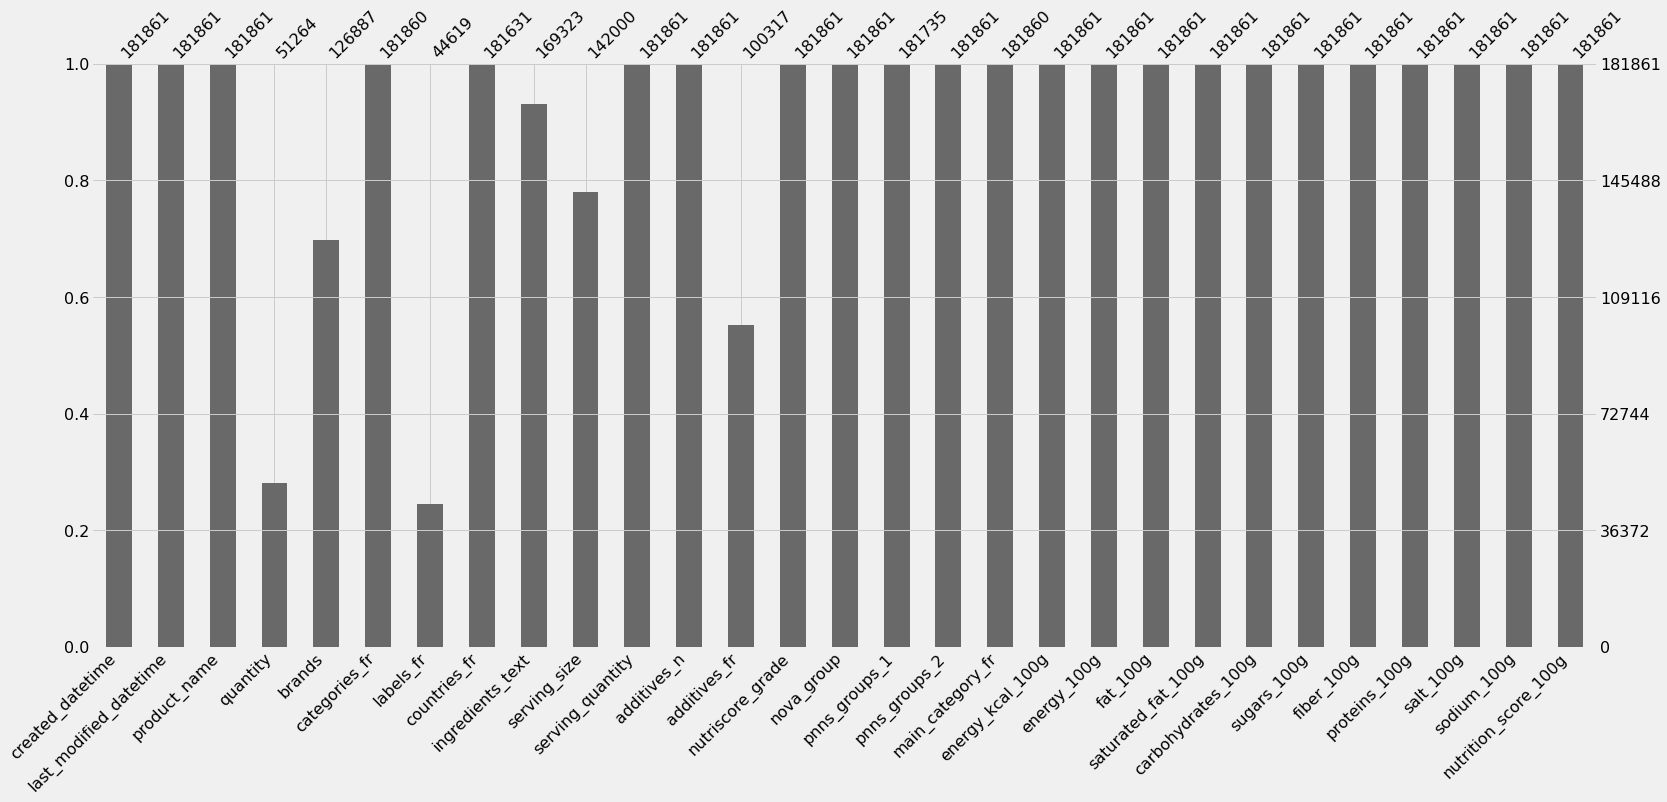

In [ ]:
msno.bar(data)

In [ ]:
print(data.isnull().sum().sort_values())
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

created_datetime               0
salt_100g                      0
proteins_100g                  0
fiber_100g                     0
sugars_100g                    0
carbohydrates_100g             0
saturated_fat_100g             0
fat_100g                       0
energy_100g                    0
energy_kcal_100g               0
pnns_groups_2                  0
sodium_100g                    0
nutriscore_grade               0
nova_group                     0
additives_n                    0
serving_quantity               0
product_name                   0
last_modified_datetime         0
nutrition_score_100g           0
main_category_fr               1
categories_fr                  1
pnns_groups_1                126
countries_fr                 230
ingredients_text           12538
serving_size               39861
brands                     54974
additives_fr               81544
quantity                  130597
labels_fr                 137242
dtype: int64
Remaining data : 181861 rows /

## 6. Save cleaned CSV

In [ ]:
from datetime import datetime
#data.to_csv('cleaned-data_{}.csv'.format(datetime.now().strftime("%Y-%m-%d")), sep='\t')
data.to_csv('cleaned_data.csv', sep='\t')